In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("StarClassificationDataset.csv")

# Display the first few rows
df.head()

C:\Users\Manasvi Nekkanti\AppData\Local\Temp\ipykernel_9968\2434209090.py:4: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StarClassificationDataset.csv")


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [5]:
df["alpha"] = pd.to_numeric(df["alpha"], errors="coerce")
df["delta"] = pd.to_numeric(df["delta"], errors="coerce")
df["run_ID"] = pd.to_numeric(df["run_ID"], errors="coerce")

In [6]:
print(df.isnull().sum())

object_ID         0
alpha             2
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            7
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64


In [7]:
df["alpha"].fillna(df["alpha"].mean(), inplace=True)
df["delta"].fillna(df["delta"].mean(), inplace=True)
df["run_ID"].fillna(df["run_ID"].median(), inplace=True)

In [8]:
# Check data types of all columns
print(df.dtypes)

object_ID         float64
alpha             float64
delta             float64
UV_filter         float64
green_filter      float64
red_filter        float64
near_IR_filter    float64
IR_filter         float64
run_ID            float64
rerun_ID            int64
cam_col             int64
field_ID            int64
spec_obj_ID       float64
red_shift         float64
plate_ID            int64
MJD                 int64
fiber_ID            int64
class              object
dtype: object


In [9]:
# Check for missing values
df.isnull().sum()

object_ID         0
alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            0
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [11]:
# Define features (X) and target variable (y)
X = df.drop(columns=["class", "object_ID"])  # Remove object ID since it's irrelevant
y = df["class"]  # Target variable

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Converts Star, Galaxy, QSO to 0, 1, 2

# Print class mapping
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Class Mapping:", label_mapping)

Class Mapping: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}


In [13]:
from sklearn.model_selection import train_test_split

# Stratified train-test split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform training data, transform validation data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report

# Predict on validation set
y_pred = clf.predict(X_val)

# Print classification report
report = classification_report(y_val, y_pred, target_names=encoder.classes_)
print(report)

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.93      0.95      3792
        STAR       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



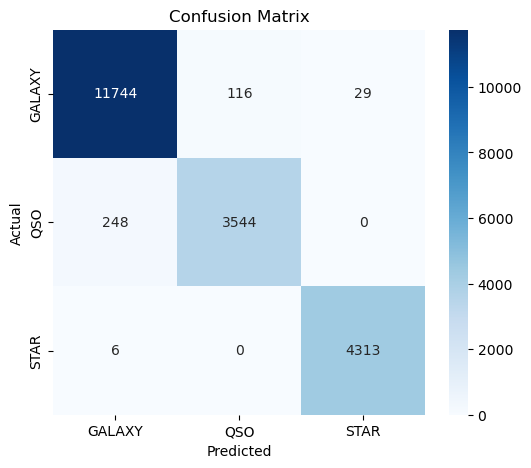

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv("housing.csv")

# Display the first few rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
# Check for missing values
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [20]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

# Compute number of bins using Sturge's Rule
num_bins = int(1 + np.log2(len(df)))

# Create price bins for stratification
df["price_bin"] = pd.cut(df["median_house_value"], bins=num_bins, labels=False)

# Perform stratified train-test split (80-20 split)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["price_bin"])

# Drop the price_bin column since it's only needed for stratification
train_set.drop(columns=["price_bin"], inplace=True)
test_set.drop(columns=["price_bin"], inplace=True)

In [22]:
# Separate features and target variable
X_train = train_set.drop(columns=["median_house_value"])
y_train = train_set["median_house_value"]
X_test = test_set.drop(columns=["median_house_value"])
y_test = test_set["median_house_value"]

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_train_encoded = encoder.fit_transform(X_train[["ocean_proximity"]])
X_test_encoded = encoder.transform(X_test[["ocean_proximity"]])

# Convert to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, index=X_test.index)

# Drop original categorical column and concatenate encoded data
X_train.drop(columns=["ocean_proximity"], inplace=True)
X_test.drop(columns=["ocean_proximity"], inplace=True)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform on train set, transform only on test set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Train Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.512e+12, tolerance: 2.200e+10
  model = cd_fast.enet_coordinate_descent(


In [28]:
# Define function to print metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 40)

# Evaluate both models
evaluate_model(y_test, ridge_pred, "Ridge Regression")
evaluate_model(y_test, lasso_pred, "Lasso Regression")

Ridge Regression Performance:
Mean Absolute Error (MAE): 49609.61
Mean Squared Error (MSE): 4707445952.95
Root Mean Squared Error (RMSE): 68610.83
----------------------------------------
Lasso Regression Performance:
Mean Absolute Error (MAE): 49610.44
Mean Squared Error (MSE): 4707422590.81
Root Mean Squared Error (RMSE): 68610.66
----------------------------------------


In [29]:
#Since both the models have an almost similar RMSE value, it means that their overall performance was the same.

In [30]:
#Similar MSE values indicate that neither of the models are great at handling errors

In [31]:
#MAE also being very similar means that both have siilar absolute error prediction

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Define alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Ridge Regression Grid Search
ridge_model = Ridge()
ridge_params = {"alpha": alpha_values}
ridge_grid = GridSearchCV(ridge_model, ridge_params, scoring="neg_mean_squared_error", cv=5)
ridge_grid.fit(X_train, y_train)

# Lasso Regression Grid Search
lasso_model = Lasso()
lasso_params = {"alpha": alpha_values}
lasso_grid = GridSearchCV(lasso_model, lasso_params, scoring="neg_mean_squared_error", cv=5)
lasso_grid.fit(X_train, y_train)

# Get the best alpha values
best_ridge_alpha = ridge_grid.best_params_["alpha"]
best_lasso_alpha = lasso_grid.best_params_["alpha"]

print(f"Best Ridge Alpha: {best_ridge_alpha}")
print(f"Best Lasso Alpha: {best_lasso_alpha}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.018e+12, tolerance: 1.760e+10
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+12, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.004e+12, toleranc

Best Ridge Alpha: 10
Best Lasso Alpha: 10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.283e+10, tolerance: 2.200e+10
  model = cd_fast.enet_coordinate_descent(


In [33]:
# Train Ridge with best alpha
best_ridge = Ridge(alpha=best_ridge_alpha)
best_ridge.fit(X_train, y_train)
ridge_pred = best_ridge.predict(X_test)

# Train Lasso with best alpha
best_lasso = Lasso(alpha=best_lasso_alpha)
best_lasso.fit(X_train, y_train)
lasso_pred = best_lasso.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.283e+10, tolerance: 2.200e+10
  model = cd_fast.enet_coordinate_descent(


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to print model performance
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"{model_name} Performance (After Tuning):")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 40)

# Evaluate both models
evaluate_model(y_test, ridge_pred, "Ridge Regression")
evaluate_model(y_test, lasso_pred, "Lasso Regression")

Ridge Regression Performance (After Tuning):
Mean Absolute Error (MAE): 49602.65
Mean Squared Error (MSE): 4707773943.42
Root Mean Squared Error (RMSE): 68613.22
----------------------------------------
Lasso Regression Performance (After Tuning):
Mean Absolute Error (MAE): 49610.18
Mean Squared Error (MSE): 4707680398.08
Root Mean Squared Error (RMSE): 68612.54
----------------------------------------


In [35]:
#Values have gotten worse than before tuning.